## Singles, doubles and triplets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('amino_acid_genotypes_to_brightness.tsv', sep = '\t', engine = 'python')
mut_df = df['aaMutations'].str.split(':').apply(pd.Series)  #returns a dataframe with the aminoacids nicely separated 
mut_df.head()  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SA108D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SA108D,SN144D,SI186V,SM231T,SL234P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SA108D,SY141N,SH146L,SE220G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA108G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.uniqueBarcodes[1:].describe()

count    54024.000000
mean         1.191952
std          2.049403
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         59.000000
Name: uniqueBarcodes, dtype: float64

In [4]:
mut_df = pd.concat((mut_df,df[['medianBrightness', 'uniqueBarcodes']]), axis=1)

In [5]:
mutants = df['aaMutations']       #split to list of aminoacids
mutants = mutants.str.split(':')

mut_len = np.zeros(len(mutants))  #start from index 1 to drop the first NaN
for i in xrange(1,mutants.shape[0]):
    mut_len[i]=len(mutants[i])

In [6]:
singles_df=mut_df.ix[mut_len==1].dropna(axis=1)
doubles_df=mut_df.ix[mut_len==2].dropna(axis=1)
triplets_df=mut_df.ix[mut_len==3].dropna(axis=1)

In [7]:
triplets_df.shape

(12683, 5)

In [8]:
singles_df.shape

(1114, 3)

In [9]:
doubles_df.shape

(13010, 4)

In [10]:
first_colum_app=[]
for i in xrange(len(singles_df)):
    first_colum_app.append(sum(doubles_df[0]==singles_df.values[i,0]))        

In [11]:
singles_df['app_doubles0'] = first_colum_app

In [12]:
second_colum_app=[]
for i in xrange(len(singles_df)):
    second_colum_app.append(sum(doubles_df[1]==singles_df.values[i,0]))

In [13]:
singles_df['app_doubles1'] = second_colum_app

In [14]:
singles_df['total_app']= singles_df.app_doubles0+singles_df.app_doubles1
singles_df.head()

,0,medianBrightness,uniqueBarcodes,app_doubles0,app_doubles1,total_app
1,SA108D,1.301030,1,0,3,3
4,SA108G,3.708478,2,1,0,1
10,SA108S,3.872970,1,2,2,4
17,SA108T,3.137392,1,1,0,1
34,SA152T,3.739811,3,6,13,19


In [15]:
print 'Sorted appear of singles in the doubles dataframe'
singles_df.sort_values(by='total_app', ascending=False).head()

Sorted appear of singles in the doubles dataframe


,0,medianBrightness,uniqueBarcodes,app_doubles0,app_doubles1,total_app
35232,SN119S,3.739439,50,74,62,136
23683,SK154E,3.703634,42,47,69,116
22724,SK111R,3.715938,38,68,46,114
36586,SN162S,3.661418,44,33,78,111
12664,SF6L,3.644999,55,105,4,109


In [16]:
singles_df['aamutation']= singles_df[0]


In [17]:
singles_df = singles_df.drop([0],axis=1)

### Plot something with Bokeh

In [18]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [19]:
brightnessNorm = ((singles_df.medianBrightness-singles_df.medianBrightness.min())/
         (singles_df.medianBrightness.max()-singles_df.medianBrightness.min()))

x = np.arange(len(singles_df))
y = singles_df.total_app
radii = (((singles_df.uniqueBarcodes-singles_df.uniqueBarcodes.min())/
          (singles_df.uniqueBarcodes.max()-singles_df.uniqueBarcodes.min()))+1)**5
colors = [
    "#%02x%02x%02x" % (105, int(g), 20) for g in (brightnessNorm*255)
]

source = ColumnDataSource(data=singles_df)

tooltips = [
        ('aamutation','@aamutation'),
        ('medianBrightness','@medianBrightness'),
        ('uniquebarcod','@uniqueBarcodes')]



TOOLS="pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

ALPHA = brightnessNorm

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.7,
          line_color=None, source=source)

p.background_fill_color, p.background_fill_alpha = ("grey",0.2)

p.add_tools(HoverTool(tooltips=tooltips))

#output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

In [20]:
singles_df.uniqueBarcodes.min()

1

In [21]:
doubles_df.ix[np.where('SN119S' in doubles_df[0].values)]

,0,1,medianBrightness,uniqueBarcodes
0,NaN,NaN,NaN,NaN


In [22]:
'SN119S' in doubles_df

False

In [23]:
SN119S_indoubles = doubles_df.ix[doubles_df[0].str.contains('SN119S') | doubles_df[1].str.contains('SN119S')]

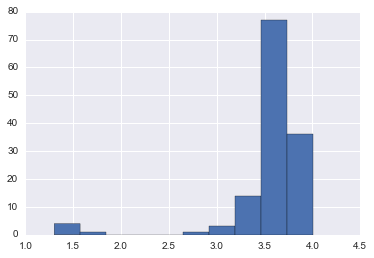

In [24]:
SN119S_indoubles.medianBrightness.hist()

In [25]:
brightnessNorm = ((singles_df.medianBrightness-singles_df.medianBrightness.min())/
         (singles_df.medianBrightness.max()-singles_df.medianBrightness.min()))

x = singles_df.total_app
y = singles_df.medianBrightness
radii = (((singles_df.uniqueBarcodes-singles_df.uniqueBarcodes.min())/
          (singles_df.uniqueBarcodes.max()-singles_df.uniqueBarcodes.min()))+1)**2
colors = [
    "#%02x%02x%02x" % (150, int(g), 10) for g in (brightnessNorm*255)
]

source = ColumnDataSource(data=singles_df)

tooltips = [
        ('aamutation','@aamutation'),
        ('medianBrightness','@medianBrightness'),
        ('uniquebarcod','@uniqueBarcodes')]



TOOLS="pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

ALPHA = brightnessNorm

p = figure(tools=TOOLS, title="brightness vs appear")

p.yaxis.axis_label = "Fluorescense"
p.xaxis.axis_label = "number of appereance of singles in doubles"
p.xaxis.axis_label_text_font_size = '20'

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None, source=source)

p.background_fill_color, p.background_fill_alpha = ("black",0.5)

p.add_tools(HoverTool(tooltips=tooltips))

#output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

In [26]:
singles_df.corr()

,medianBrightness,uniqueBarcodes,app_doubles0,app_doubles1,total_app
medianBrightness,1.000000,0.200305,0.115083,0.167983,0.176955
uniqueBarcodes,0.200305,1.000000,0.763603,0.752972,0.944621
app_doubles0,0.115083,0.763603,1.000000,0.288200,0.794144
app_doubles1,0.167983,0.752972,0.288200,1.000000,0.810816
total_app,0.176955,0.944621,0.794144,0.810816,1.000000


In [27]:
singles_uniqe=len(np.unique(singles_df['aamutation'].values))

In [28]:
n_aa = 240 * 19
print n_aa

4560


In [29]:
singles_percent = float(singles_uniqe) / float(n_aa)
singles_percent

0.2442982456140351

In [30]:
len(singles_df['aamutation'].values)

1114

In [31]:
singles_df.total_app.sum() / float(n_aa)

5.510526315789473